In [3]:
import pandas as pd
import numpy as np
## plot all the original parameters

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import pylab
# This line is necessary for the plot to appear in a Jupyter notebook (you don't need it if you're working in Rodeo)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook (n/a if working in Rodeo)
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7)   # Change the size of plots


C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Populating the interactive namespace from numpy and matplotlib


C:\softwares\conda4.8.2-python3.7\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [5]:
# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

In [6]:
import os
import os.path as osp
from pathlib import Path
data_path = osp.join(Path(os.getcwd()).parent,'Data')

In [7]:
dj = pd.read_csv(data_path + "/dowjones_modified.csv")

### OHLC Chart

In [108]:
### An OHLC chart shows the open, high, low and close prices of a stock. 
### It shows  how the price was changing during a particular day and gives s sense of momentum or volatility of stock.
### The tip of the lines represent the low and high values and the horizontal segments represent the open and close values. 
### Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). 
### By default, increasing items are drawn in green whereas decreasing are drawn in red.

In [109]:
fig = go.Figure([go.Ohlc(x=dj.Date,
                         open=dj.Open,
                         high=dj.High,
                         low=dj.Low,
                         close=dj.Close)])
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [110]:
# we set the index as date over here and sorts the dataframe in increasing order of date for our later analysis

dj = dj.set_index('Date')
dj = dj.sort_index(ascending=True)
dj.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Adj Close
count,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3.037000e+03,3037.000000
mean,831.641093,17078.590978,17174.441000,16977.195274,17082.283625,2.142065e+08,17082.283625
std,545.548761,5864.448003,5880.881957,5845.604559,5863.932484,1.336270e+08,5863.932484
min,0.000000,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,379.000000,12144.410156,12217.330078,12068.009766,12151.259766,1.110400e+08,12151.259766
50%,759.000000,16551.230469,16622.949219,16468.070312,16553.929688,1.799700e+08,16553.929688
75%,1229.000000,21787.509766,21879.220703,21693.630859,21796.550781,2.878800e+08,21796.550781
max,1988.000000,29440.470703,29568.570313,29406.750000,29551.419922,2.190810e+09,29551.419922


###  EDA of original stock exchange parameters

#### Rolling method and inferences

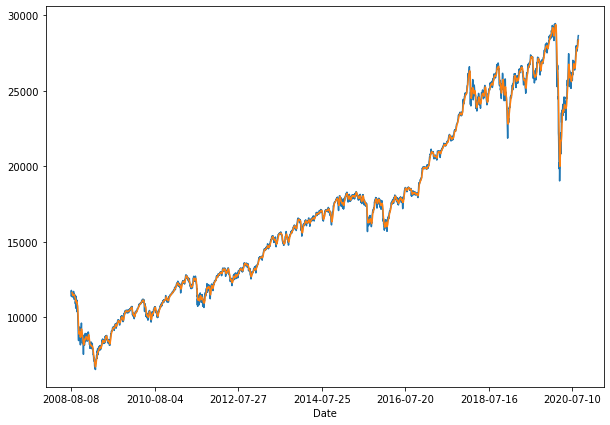

In [111]:
# Plot the adjusted opening price of Dija.Since we are considerng change of open price of Stcok data on daily basis as 
# we are plotting it .
# we plot the original Open price
# We also try to find the average by week using moving average or rolling mean of the Close price


dj["Open"].plot(grid = True)
dj.rolling(window=7).mean()['Close'].plot()

In [112]:
#we can see orange line is less noisy thatn the blue line meaning 
#we are able to capture the trend more effectively using rolling window

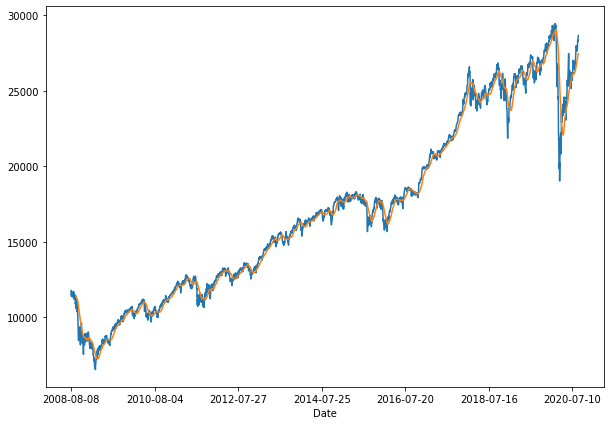

In [113]:
#we continue the same experiment  using monthly rolling mean window and then plot.

dj["Open"].plot(grid = True)
dj.rolling(window=30).mean()['Close'].plot()

In [114]:
## The orange line becomes much less noisy than the previously tracked 7 day rolling window for closing price.
### the inference from above observations are that considering rolling mean or moving average of stcok values over
### a period of time helps to capture the trend more efficiently than the original value over a day

#### Expanding function and inferences

In [115]:
#The expanding function along with the aggregate function mean works as a rolling function in that it computes
#the average mean of all the previous stock values at specific time steps. With the expanding function , we will
#be able to understand whether the trend of the stock prices is increasing,decreasing or stationary.

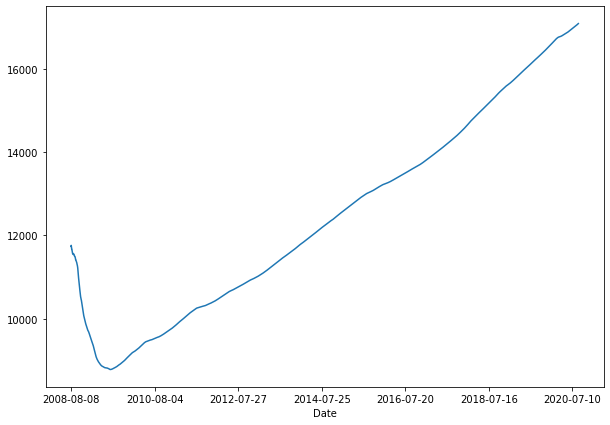

In [116]:
dj['Close'].expanding(min_periods=1).mean().plot()

In [117]:
### from the above figure we can clearly notice that the stock trend went decreasing from Aug-2008 to reach a 
### slide on Aug 2009 from whereupon it gradually follow an incremental trend till end of 2015

In [118]:
##!pip install statsmodels

#### ETS Decomposition

In [119]:
### ETS decomposition models  help us to visualize time series data with respect to the components
### like Trend,Seasonality,Cyclical patterns,irregular patterns


C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 720x504 with 0 Axes>

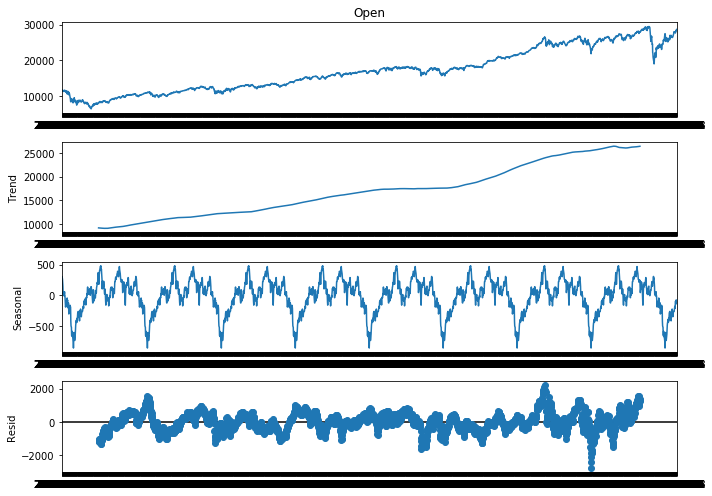

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dj['Open'],freq = 365)
### since we are observing yearly trends and seasonality the frequency is chosen as 365 for dow jones data which
### is a daily indicator

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10,7)

In [121]:
### From the preseding output we can see the important components of time-series data such as trend,seasonality,residuals
### (error difference)  and the observed data.ETS decomposition helps us to get more insights on stock pattern and trend
### it also provides information whether the data is seasonal or not

In [122]:
### we infer that Dow jones industrial exchange follows a seasonal pattern and that there are both uptrends and downtrends
### in the trending pattern. 
###Let us find out whether the dataset is also staionary or not.We will conduct Dickey Fuller test for that

In [123]:
timeseries = dj['Open']

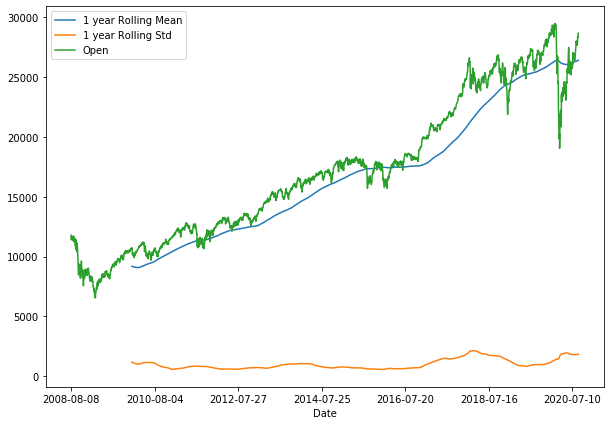

In [124]:
timeseries.rolling(365).mean().plot(label='1 year Rolling Mean')
timeseries.rolling(365).std().plot(label='1 year Rolling Std')
timeseries.plot()
plt.legend()

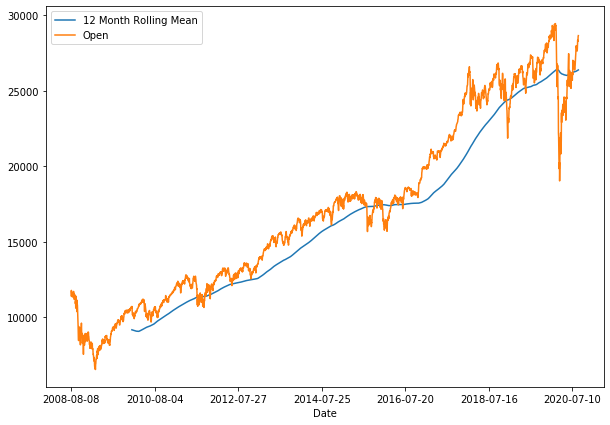

In [125]:
timeseries.rolling(365).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend()

### Dicky Fuller test

In [126]:

# We can use the Augmented Dickey-Fuller unit root test.
# In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.
# Basically, we are trying to whether to accept the Null Hypothesis H0 (that the time series has a unit root, indicating it is non-stationary) or reject H0 and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).
# We end up deciding this based on the p-value return.
# A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
# A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

In [127]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [128]:
from statsmodels.tsa.stattools import adfuller
adf_check(dj['Open'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.05494828481013105
p-value : 0.953745047846297
#Lags Used : 27
Number of Observations Used : 3009
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [88]:
##we observe that p-value is more than 0.05 hence we fail to reject null hypothesis
##There after we calculate daily differential opening price with and conduct a secong adf test on that data 

In [130]:
dj['cap'] =  dj['Open'].shift(-1) - dj['Open']
adf_check(dj['cap'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.403445482448456
p-value : 7.549508591902999e-21
#Lags Used : 26
Number of Observations Used : 3009
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [131]:
# Here we see the p-vaue is reduced below 0.05 and hence we can safely reject the null hypothesis which state that
# the time series value has a unit root, indicating it is non-stationary. 


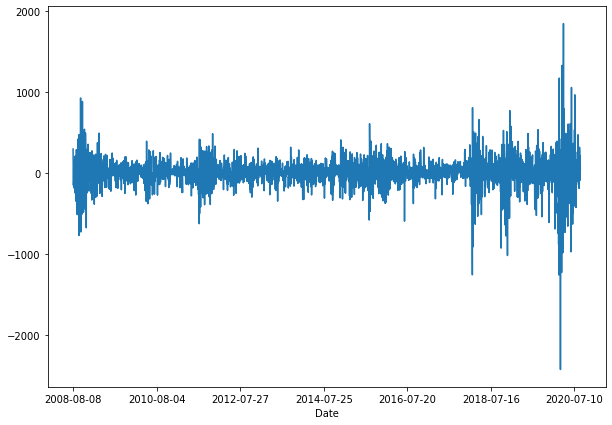

In [132]:
dj['cap'].plot()

In [133]:
#Distribution of intra-day chane in price 

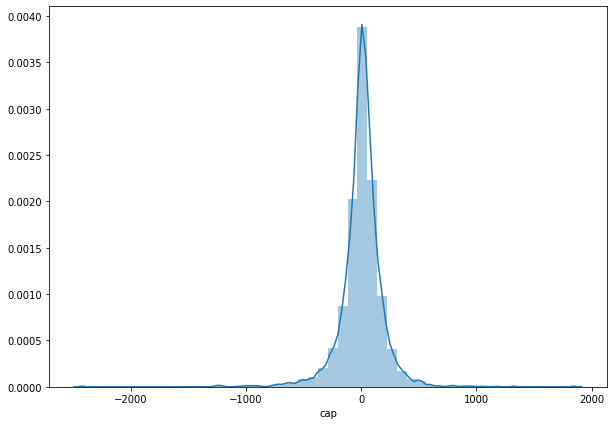

In [134]:
import seaborn as sns
ax = sns.distplot(dj['cap'])

### Observations from EDA
##### 1. The Time series based stock data is seasonal 
##### 2. It has both uptrends and downtrends 
##### 3. the stock data w.r.t to daily opening value is non-stationery but w.r.t intra-day differential opening value it's stationary
#####  4. the distribution of change in price is somwewhat normal 
 

### Conclusions from EDA

#### 1.from the observation 3 we can presume that the differential Intraday opening value can be formulated as the response variable
#### 2.It makes sense to derive moving avreage/statitics based technical indicators from the above data due to properties 1,2 and 3

In [135]:
#### 3.we also choose our moving window to be 7 allthough choosing 30 gave us lesser noises but recency of price changes needed to be considered as well


In [136]:
n=7

### Technical indicator Derivation

In [137]:

#let's consider past 7 days data
dj['MA'] = dj['Close'].rolling(window=7).mean()
dj['HH']  = dj['High'].rolling(window=7).max()
dj['LL']  = dj['Low'].rolling(window=7).min()

djmiss = dj[dj['MA'].isna()]
djmiss['row_num'] = np.arange(len(djmiss)) +1
djmiss['row_num'] = djmiss['row_num'].astype(int)
row_num_inx = djmiss.columns.get_loc("row_num")

C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
def app_mean_close(x):    
    x = x.tolist()
    row_count = int(x[row_num_inx])
    y=djmiss['Close'].rolling(window=row_count).mean().tolist()
    return y[row_count-1]

def app_max_high(x):    
    x = x.tolist()
    row_count = int(x[row_num_inx])
    y=djmiss['High'].rolling(window=row_count).max().tolist()
    return y[row_count-1]

def app_min_low(x):    
    x = x.tolist()
    row_count = int(x[row_num_inx])
    y=djmiss['Low'].rolling(window=row_count).min().tolist()
    return y[row_count-1]


In [139]:
djmiss['HH'] = djmiss.apply(lambda x : app_max_high(x),axis=1)
djmiss['LL'] = djmiss.apply(lambda x : app_min_low(x),axis=1)
djmiss['MA'] = djmiss.apply(lambda x : app_mean_close(x),axis=1)


C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [140]:
dj.update(djmiss)

In [141]:
## https://www.investopedia.com/ each of the belowterms are found in investopidia
# Stochastic %K = Ct - Lln / Hhn - Lln
# Stochastic %D = sum (i=0 to n) Kt-i  / n %
# Momentum   =   Ct - Ct-n
# Rate of Change = Ct / Ct-n * 100 
# William’s %R   = (Hn - Ct/Ht - Ln) * 100
# A/D Oscillator = (Ht - Ct-1 / Ht - Lt) 
# Disparity n    = Ct/MAn * 100

# [where Ct is the closing price at day t , Ht  is the highest price at day t,  
#  Lt is the lowest price at day t, MAn is moving average of the past n days,
#  and Hhn and Lln are the highest high and the lowest low in the past n days, 
#  respectively ].These values are taken as predictors and 
# intra-day stock price change as the response variable.]

In [142]:
dj['row_num'] = np.arange(len(dj)) +1
dj['row_num'] = dj['row_num'].astype(int)

row_num_inx = dj.columns.get_loc("row_num")
close_index = dj.columns.get_loc("Close")
high_index  = dj.columns.get_loc("High")
low_index  = dj.columns.get_loc("Low")

In [143]:
def calculate_stochaistic_D(row):    
    row_num = row[row_num_inx]    
    if row_num >=n:
        df = dj[dj['row_num'].between(row_num-n, row_num)]
    else:
        df = dj[dj['row_num'].between(1, row_num)]        
    stock_d = df['stochaistic_k_percent'].sum() / n     
    return stock_d


def calculate_momentum(row):
    row_num = row[row_num_inx]
    curr_close = row[close_index]
    if row_num > n:
        prevclose_df = dj[dj['row_num']== (row_num-n)]
    else:
        prevclose_df = dj[dj['row_num'] == 1]    
    prev_close_val = float(prevclose_df['Close'].tolist()[0])    
    return curr_close - prev_close_val


def caculate_roc(row):    
    row_num = row[row_num_inx]    
    ct = row[close_index]    
    if row_num > n:
        prevclose_df = dj[dj['row_num']== (row_num-n)]
    else:
        prevclose_df = dj[dj['row_num'] == 1]    
    prev_close_val = float(prevclose_df['Close'].tolist()[0])    
    ctn = ct - prev_close_val      
    return (ct/ctn) * 100


def calculate_ad_oscillator(row):    
    row_num = row[row_num_inx]    
    ct = row[close_index]    
    prevclose_df = dj[dj['row_num']== (row_num-1)]    
    if prevclose_df.empty:
        prevclose_df = dj[dj['row_num']== (row_num)]  
    prev_close_val = float(prevclose_df['Close'].tolist()[0])    
    retval = (row[high_index] - prev_close_val)/(row[high_index] - row[low_index])    
    return retval


In [144]:
#calculate stochastioc k
dj['stochaistic_k_percent'] = ((dj['Close'] - dj['LL'])/(dj['HH'] - dj['LL'])) *100
dj['stochaistic_D'] = dj.apply(lambda x : calculate_stochaistic_D(x),axis=1)
dj['Momentum'] = dj.apply(lambda x : calculate_momentum(x),axis=1)
dj['rate_of_change'] = dj.apply(lambda x : caculate_roc(x),axis=1)
dj['William_R_percent'] = (dj['HH'] - dj['Close'])/(dj['HH'] - dj['LL'])
dj['AD_oscillator'] =  dj.apply(lambda x : calculate_ad_oscillator(x),axis=1)
dj['Disparity'] = (dj['Close']/dj['MA'])*100

C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning:

divide by zero encountered in double_scalars



In [145]:
#remove 1 null row @end and update the row in main dataframe after calculating mean roc
dj = dj[dj.Open.notnull()]
djx = dj[dj['row_num']==1]
roc_mean = dj[dj['row_num']!=1]['rate_of_change'].mean()
djx['rate_of_change'] = roc_mean
dj.update(djx)

C:\softwares\conda4.8.2-python3.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
#drop nan rows
dj = dj.dropna()
#reset index and drop redundant columns
#dj.reset_index(drop=True, inplace=True)


In [147]:
dj_org = dj[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close','cap']]
dj_org.head(5)

,Open,High,Low,Close,Volume,Adj Close,cap
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,297.580078
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,52.030273
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,-148.890625
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,-100.739258
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,79.139649


In [148]:
dj_org.to_csv(data_path+'/stock_original.csv')

In [149]:
dj_ti = dj.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'MA', 'HH', 'LL','row_num'],axis=1)

In [150]:
dj_ti.head()

,Unnamed: 0,cap,stochaistic_k_percent,stochaistic_D,Momentum,rate_of_change,William_R_percent,AD_oscillator,Disparity
Date,,,,,,,,,
2008-08-08,1988.0,297.580078,93.106137,13.300877,0.000000,8649.194013,0.068939,0.068939,100.000000
2008-08-11,1987.0,52.030273,82.307244,25.059054,48.029297,24531.588728,0.176928,0.693131,100.204235
2008-08-12,1986.0,-148.890625,53.109049,32.646061,-91.850585,-12675.444285,0.468910,0.000000,99.340910
2008-08-13,1985.0,-100.739258,30.250241,36.967524,-201.360351,-5727.522774,0.697498,-0.048157,98.800097
2008-08-14,1984.0,79.139649,47.569144,43.763116,-118.390624,-9811.528393,0.524309,0.693070,99.608320


### Technical Indicator Visualization

In [151]:
dj_ti.describe()
dj_ti['Date'] = dj_ti.index

In [152]:
##!pip install plotly

### Stochaistic STI

In [153]:
# The stochastic oscillator is quite similar to RSI in the sense that it's values (also in range 0-100) can indicate 
# whether a stock is overbought/oversold or not. It is arguably the most complicated indicator compared to the ones
# introduced earlier. Stochastic can be calculated as:

# %K=(C−L14H14−L14)×100 
# where:  C  is the most recent close price,  L14  and  H14  are the lowest/highest prices traded in last 14 days.
# This  %K  stochastic is often referred as the "slow stochastic indicator". 
# There is also a "fast stochastic indicator" that can be obtained as:
# %D=SMA3(%K)
 
# You can read more about stochastics and how their values/crossovers indicate trade signals here.

In [154]:
#considering the index of latest year of Dija Data
fig = go.Figure()
fig.add_trace(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.stochaistic_k_percent.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.stochaistic_D.tail(365), name='D stochastic'))
fig.show()

In [155]:
#considering the index of 1st year of Dija Data
fig = go.Figure()
fig.add_trace(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.stochaistic_k_percent.head(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.stochaistic_D.head(365), name='D stochastic'))
fig.show()

### RSI

In [156]:
# Another commonly used indicator is a Relative Strength Index (RSI) that indicates magnitude of recent price changes.
# It can show that a stock is either overbought or oversold. Typically RSI value of 70 and above signal that a stock is becoming overbought/overvalued,
# meanwhile value of 30 and less can mean that it is oversold. Full range of RSI is from 0 to 100.

In [157]:
#considering the index of latest year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.rate_of_change.tail(365)))
fig.show()

In [158]:
#considering the index of 1st year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.rate_of_change.head(365)))
fig.show()

In [159]:
#The slides and surges are observed accordingly

### Momentum

In [160]:
#considering the index of last year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.Momentum.tail(365)))
fig.show()

In [161]:
#considering the index of 1st year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.Momentum.head(365)))
fig.show()

### William’s %R 

In [162]:
#considering the index of last year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.William_R_percent.tail(365)))
fig.show()

In [163]:
#considering the index of 1st year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.William_R_percent.head(365)))
fig.show()

### A/D Oscillator 

In [164]:
#considering the index of last year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.AD_oscillator.tail(365)))
fig.show()

In [165]:
#considering the index of 1st year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.AD_oscillator.head(365)))
fig.show()

### Disparity

In [166]:
#considering the index of last year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.tail(365), y=dj_ti.Disparity.tail(365)))
fig.show()

In [167]:
#considering the index of 1st year of Dija Data
fig = go.Figure(go.Scatter(x=dj_ti.Date.head(365), y=dj_ti.Disparity.head(365)))
fig.show()

In [168]:
dj_ti = dj_ti.drop(['Date'],axis=1)

In [169]:
#normalize with z score
def normalize(df):
    cols = df.columns
    for col in cols:
        (df[col] - df[col].mean())/df[col].std()
    return df

dj_ti = normalize(dj_ti)

In [170]:
dj_ti.to_csv(data_path + '/stock_indicators.csv')